In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


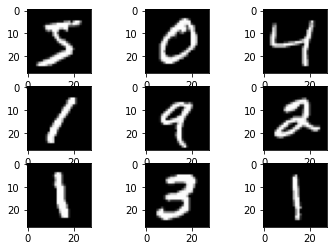

In [ ]:
from matplotlib import pyplot
(trainX, trainy), (testX, testy) = keras.datasets.mnist.load_data()

for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.savefig('mnist.pdf', dpi=500)
pyplot.show()

In [ ]:
lenet_5_model = keras.models.Sequential([
    keras.layers.Conv2D(6, kernel_size=5, strides=1,  activation='tanh', input_shape=x_train[0].shape, padding='same'),
    keras.layers.AveragePooling2D(),
    keras.layers.Conv2D(16, kernel_size=5, strides=1, activation='tanh', padding='valid'),
    keras.layers.AveragePooling2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(120, activation='tanh'),
    keras.layers.Dense(84, activation='tanh'),
    keras.layers.Dense(10, activation='softmax')
])

lenet_5_model.summary()
batch_size = 128
epochs = 30

lenet_5_model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

history = lenet_5_model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)
lenet_5_model.save('modelo.h5')

score = lenet_5_model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_2 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               48120     
_________________________________________________________________
dense_4 (Dense)              (None, 84)               

In [ ]:
import matplotlib.pyplot as plt

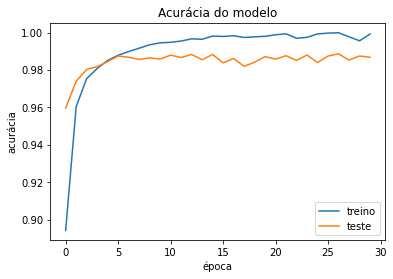

In [ ]:
fig = plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Acurácia do modelo')
plt.ylabel('acurácia')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='lower right')
fig.savefig('acc.pdf', dpi=500)

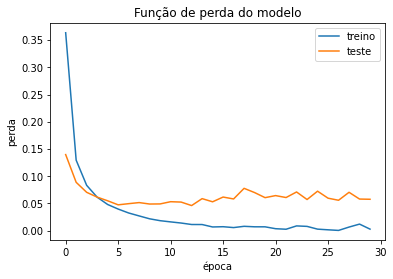

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Função de perda do modelo')
plt.ylabel('perda')
plt.xlabel('época')
plt.legend(['treino', 'teste'], loc='upper right')
plt.savefig('loss.pdf', dpi=500)
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
preds = lenet_5_model.predict(x_test)
preds = np.argmax(preds, axis=1)

7


In [ ]:
y_test = np.argmax(y_test, axis=1)

7


In [ ]:
confusion = confusion_matrix(y_test, preds)
print('Confusion Matrix\n')
print(confusion)

Confusion Matrix

[[ 971    0    1    0    0    0    3    1    4    0]
 [   0 1130    1    0    0    0    2    1    1    0]
 [   0    0 1025    1    1    0    0    4    1    0]
 [   0    0    1 1000    0    2    0    2    3    2]
 [   0    0    1    0  969    0    3    1    0    8]
 [   1    0    0   12    0  877    2    0    0    0]
 [   4    2    2    0    1    3  945    0    1    0]
 [   0    0    7    2    0    0    0 1015    2    2]
 [   2    0    3    3    1    1    0    1  961    2]
 [   1    0    0    3    7    2    0    3    1  992]]


In [ ]:
from pylab import savefig
import seaborn as sn

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


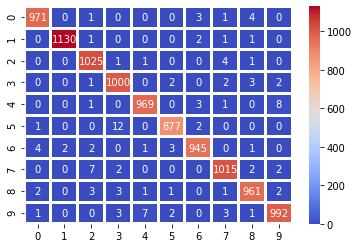

In [ ]:
cm = sn.heatmap(confusion, annot=True, cmap='coolwarm',fmt="d", linecolor='white', linewidths=2)
figure = cm.get_figure()
figure.savefig('cm.pdf', dpi=500)

In [ ]:
!pip install tensorflowjs

In [ ]:
!tensorflowjs_converter --input_format=keras modelo.h5 /